<a href="https://colab.research.google.com/github/Christelleelkhoury/AAI614_-ElKhoury-/blob/main/Week%206/Notebook6.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 6.2: K-Means Clustering*


Source: This notebook contains excerpts from *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurélien Géron*

Dataset Loan prediction [here](https://drive.google.com/file/d/1ZzEouo7lRJvajxK6jLM2K_p9xAwGw1tS/view)

This lab requires Scikit-Learn ≥ 1.0.1:

In [1]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Define the default font sizes to make the figures prettier:

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

from sklearn.datasets import load_iris


## K-Means

**Fit and predict**

In [4]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/clustering.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
from sklearn.cluster import KMeans

X = data[["LoanAmount","ApplicantIncome"]]

k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

Explicitly set `n_init=10` when creating a `KMeans` estimator to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to `"auto"` in Scikit-Learn 1.4.

Now let's plot them:

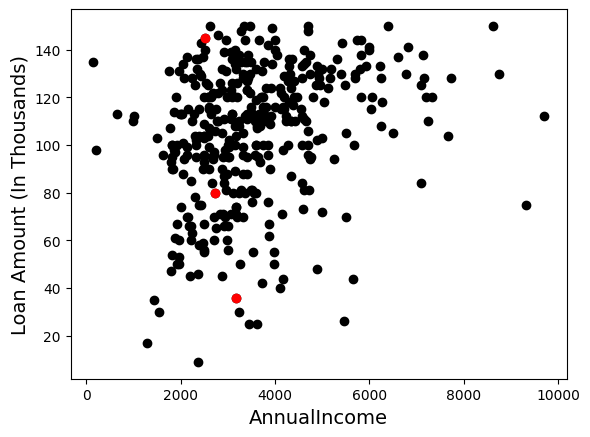

In [7]:
Centroids = (X.sample(n=k))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Each instance was assigned to one of the 5 clusters:

In [8]:
y_pred

array([1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1,

In [9]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [10]:
kmeans.cluster_centers_

array([[  97.47252747, 2497.97252747],
       [ 109.75641026, 4033.59615385],
       [ 119.48837209, 6512.76744186]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to (they are not targets, they are predictions):

In [11]:
kmeans.labels_

array([1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1,

**Decision Boundaries**

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define plotting functions
def plot_data(X):
    """Plots the data points."""
    # Access DataFrame columns using .iloc or .loc
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='k', s=20, label="Data Points", zorder=5)
    # Or use:
    # plt.scatter(X['LoanAmount'], X['ApplicantIncome'], c='k', s=20, label="Data Points", zorder=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    """Plots centroids as circles and crosses."""
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=200, linewidths=4,
                color=circle_color, zorder=10, edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=100, linewidths=3,
                color=cross_color, zorder=11)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    """Plots decision boundaries for K-means clustering."""
    # Define grid boundaries
    mins = X.min(axis=0) - 0.1  # Use Pandas .min()
    maxs = X.max(axis=0) + 0.1  # Use Pandas .max()

    # Generate a grid of points
    x_grid, y_grid = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution)
    )

    # Predict the cluster for each grid point
    # Convert to NumPy array before using with the clusterer
    Z = clusterer.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
    Z = Z.reshape(x_grid.shape)

    # Plot the decision boundaries
    plt.contourf(x_grid, y_grid, Z, cmap="Pastel2", alpha=0.8)
    plt.contour(x_grid, y_grid, Z, linewidths=1, colors='k')

    # Plot the actual data points
    plot_data(X)

    # Optionally plot centroids
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    # Optionally add axis labels
    if show_xlabels:
        plt.xlabel("Loan Amount")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Applicant Income", rotation=90)
    else:
        plt.tick_params(labelleft=False)

<ipython-input-30-a1d804d46231>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[0], maxs[0], resolution),
<ipython-input-30-a1d804d46231>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


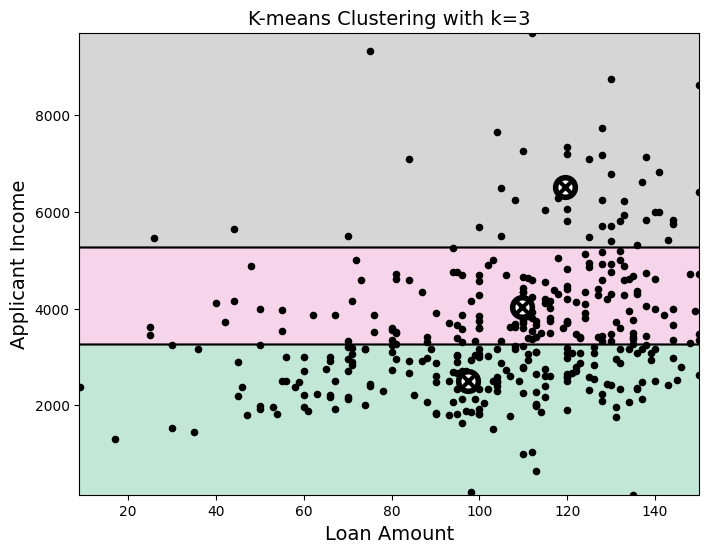

In [31]:
# Plot the clustering results
plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X)
plt.title(f"K-means Clustering with k={k}")
plt.show()